In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        # "font.sans-serif": ["Helvetica"]
    }
)

sys.path.insert(0, "../src")
from utils import heat_eq_analytic

FIGSIZE=np.array([4,3]) * 0.75

0.4999999999999999


<ipython-input-22-4e0f2d545587>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("jet"), rasterized=True)


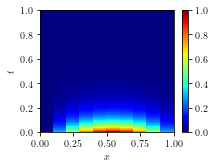

<ipython-input-22-4e0f2d545587>:50: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(X, T, relative_error, cmap=plt.get_cmap("jet"),label="MSE", rasterized=True)


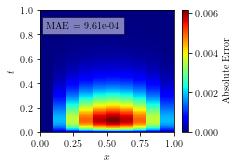

In [22]:
# Explicit scheme for solving the heat equation, given our B.C.s and I.V.s

#def explicit_FD_heat_equation(dx,dt,t_final):
tn = 1
dt = 1/200
dx = 1/10
x = np.linspace(0, 1, int(1/dx)+1)
t = np.linspace(0, tn, int(tn/dt)+1)
delta = dt/dx**2
print(delta)

solution = np.zeros((len(t),len(x))) #each timestep is on one row, since python is row-major should speed up
                                     # the matrix@ vector operation in the time-stepping due to caching.
solution[0,:] = np.sin(np.pi*x)
solution[0,-1] = 0 #Getting rid of a machine epsilon, per B.C should be identically zero.

#setup scheme matrix, should be scipy routines for faster (sparse) handling of this
scheme_matrix = np.zeros((len(x),len(x)))
building_block = np.asarray([delta, 1-2*delta, delta]) # central-difference in space, forward-euler in time.
for i in range(1,len(x)-1): #Note the zero-padding for top and bottom row, to comply with B.C
    scheme_matrix[i,i-1:i+2] = building_block # Tridiagonal matrix apart from top and bottom row.


for i in range(len(t)-1):
    solution[i+1,:] = scheme_matrix @ solution[i,:] #Numpy should interpret solution as shape (N,1) during computation
    # Wonder if this sparseness hack is faster:
    # up, center, down = solution[i,:-2], solution[i,1:-1], solution[i,2:]
    # solution[i+1,1:1] = delta*up + (1-2*delta)*center + delta*down
    

X, T = np.meshgrid(x, t)
Z = solution

fig, ax = plt.subplots(figsize=FIGSIZE)
cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("jet"), rasterized=True)
fig.colorbar(cf, ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
plt.savefig("../figs/heat_eq_euler_10.pdf")
plt.show()


Z_analytic = heat_eq_analytic(X, T)
relative_error = np.abs(Z_analytic - Z) 
MAE = np.mean(relative_error.flatten())

fig, ax = plt.subplots(figsize=FIGSIZE)
#cf = ax.pcolormesh(x, t, g, cmap=plt.get_cmap("inferno"))
#cf = ax.pcolormesh(x, t, relative_error, cmap=plt.get_cmap("inferno"),label="MSE")
cf = ax.pcolormesh(X, T, relative_error, cmap=plt.get_cmap("jet"),label="MSE", rasterized=True)
cmap = fig.colorbar(cf, ax=ax)
cmap.set_label("Absolute Error")
t = ax.annotate("MAE = %.2e" % MAE, xy=(0.05 * np.amax(x), 0.85 * np.amax(t)))
t.set_bbox(dict(facecolor='white', alpha=0.5))
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
plt.savefig("../figs/heat_eq_euler_err_10.pdf")

0.5


<ipython-input-24-4942807abd36>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("jet"), rasterized=True)


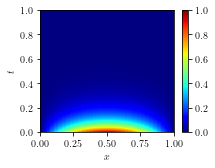

<ipython-input-24-4942807abd36>:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(X, T, relative_error, cmap=plt.get_cmap("jet"),label="MSE", rasterized=True)


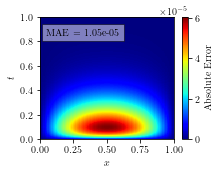

In [24]:
# Explicit scheme for solving the heat equation, given our B.C.s and I.V.s

#def explicit_FD_heat_equation(dx,dt,t_final):
tn = 1
dt = 1/20000
dx = 1/100
x = np.linspace(0, 1, int(1/dx)+1)
t = np.linspace(0, tn, int(tn/dt)+1)
delta = dt/dx**2
print(delta)

solution = np.zeros((len(t),len(x))) #each timestep is on one row, since python is row-major should speed up
                                     # the matrix@ vector operation in the time-stepping due to caching.
solution[0,:] = np.sin(np.pi*x)
solution[0,-1] = 0 #Getting rid of a machine epsilon, per B.C should be identically zero.

#setup scheme matrix, should be scipy routines for faster (sparse) handling of this
scheme_matrix = np.zeros((len(x),len(x)))
building_block = np.asarray([delta, 1-2*delta, delta]) # central-difference in space, forward-euler in time.
for i in range(1,len(x)-1): #Note the zero-padding for top and bottom row, to comply with B.C
    scheme_matrix[i,i-1:i+2] = building_block # Tridiagonal matrix apart from top and bottom row.


for i in range(len(t)-1):
    solution[i+1,:] = scheme_matrix @ solution[i,:] #Numpy should interpret solution as shape (N,1) during computation
    # Wonder if this sparseness hack is faster:
    # up, center, down = solution[i,:-2], solution[i,1:-1], solution[i,2:]
    # solution[i+1,1:1] = delta*up + (1-2*delta)*center + delta*down
    

X, T = np.meshgrid(x, t)
Z = solution

fig, ax = plt.subplots(figsize=FIGSIZE)
cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("jet"), rasterized=True)
fig.colorbar(cf, ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
plt.savefig("../figs/heat_eq_euler_100.pdf")
plt.show()

Z_analytic = heat_eq_analytic(X, T)
relative_error = np.abs(Z_analytic - Z) 
MAE = np.mean(relative_error.flatten())

fig, ax = plt.subplots(figsize=FIGSIZE)
#cf = ax.pcolormesh(x, t, g, cmap=plt.get_cmap("inferno"))
#cf = ax.pcolormesh(x, t, relative_error, cmap=plt.get_cmap("inferno"),label="MSE")
cf = ax.pcolormesh(X, T, relative_error, cmap=plt.get_cmap("jet"),label="MSE", rasterized=True)
cmap = fig.colorbar(cf, ax=ax)
cmap.set_label("Absolute Error")
t = ax.annotate("MAE = %.2e" % MAE, xy=(0.05 * np.amax(x), 0.85 * np.amax(t)))
t.set_bbox(dict(facecolor='white', alpha=0.5))
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
plt.savefig("../figs/heat_eq_euler_err_100.pdf")